# from allcools page: https://lhqing.github.io/ALLCools/cell_level/step_by_step/100kb/04a-PreclusteringAndClusterEnrichedFeatures-mCH.html

Preclustering and Cluster Enriched Features
Purpose
The purpose of this step is to perform a simple pre-clustering using the highly variable features to get a pre-clusters labeling. We then select top enriched features for each cluster (CEF) for further analysis.



Input¶
HVF adata file.

Output
HVF adata file with pre-clusters and CEF annotated.



In [1]:
conda activate /share/lasallelab/Ensi/anaconda3/allcools/

usage: conda [-h] [--no-plugins] [-V] COMMAND ...
conda: error: argument COMMAND: invalid choice: 'activate' (choose from 'clean', 'compare', 'config', 'create', 'info', 'init', 'install', 'list', 'notices', 'package', 'remove', 'uninstall', 'rename', 'run', 'search', 'update', 'upgrade', 'build', 'content-trust', 'convert', 'debug', 'develop', 'doctor', 'index', 'inspect', 'metapackage', 'render', 'repoquery', 'skeleton', 'env', 'verify', 'pack', 'token', 'repo', 'server')

Note: you may need to restart the kernel to use updated packages.


In [2]:
#!pip install openTSNE


In [7]:
#conda install -c conda-forge opentsne


Retrieving notices: ...working... done
done
Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::_anaconda_depends==2024.02=py311_mkl_1
done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.7.1



## Package Plan ##

  environment location: /share/lasallelab/Ensi/anaconda3

  added / updated specs:
    - opentsne


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.7.4   |       hbcca054_0         151 KB  conda-forge
    certifi-2024.7.4           |     pyhd8ed1ab_0         156 KB  conda-forge
    openssl-3.3.1         

In [3]:
from openTSNE import TSNEEmbedding, affinity, initialization


In [17]:
#!pip install leidenalg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 43.4 MB/s eta 0:00:00:00:01


In [ ]:
#conda install -c conda-forge leidenalg

In [4]:
import leidenalg

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
from ALLCools.clustering import cluster_enriched_features, significant_pc_test, log_scale
from ALLCools.clustering import log_scale


In [6]:
sns.set_context(context='notebook', font_scale=1.3)

In [7]:
adata_path = 'mCH.HVF.h5ad'
adata_path2 = 'mCH.HVF_c0.h5ad'
var_dim = 'chrom100k'
# Cluster Enriched Features analysis
top_n=500
alpha=0.05
stat_plot=True

# you may provide a pre calculated cluster version. 
# If None, will perform basic clustering using parameters below.
cluster_col = 'Group'  

# These parameters only used when cluster_col is None
k=25
resolution=1
cluster_plot=True

In [8]:

cell_meta = pd.read_csv('../L1_clustering_labels_expanded.csv')
adata = anndata.read_h5ad(adata_path)
adata.obs = cell_meta
adata

AnnData object with n_obs × n_vars = 120 × 25000
    obs: 'cell', 'leiden', 'umap_0', 'umap_1', 'L1', 'L1_proba', 'Group', 'AnimalID', 'Type', 'TotalRead', 'mCGFrac'
    var: 'chrom', 'end', 'start', 'CHN_mean', 'CHN_dispersion', 'CHN_cov', 'CHN_score', 'CHN_feature_select', 'CGN_mean', 'CGN_dispersion', 'CGN_cov', 'CGN_score', 'CGN_feature_select', 'leiden_enriched_features'
    uns: 'leiden', 'leiden_colors', 'leiden_feature_enrichment', 'log', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

/share/lasallelab/Ensi/anaconda3/lib/python3.11/site-packages/scanpy/tools/_umap.py:184: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["umap"] = {"params": {"a": a, "b": b}}
/share/lasallelab/Ensi/anaconda3/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


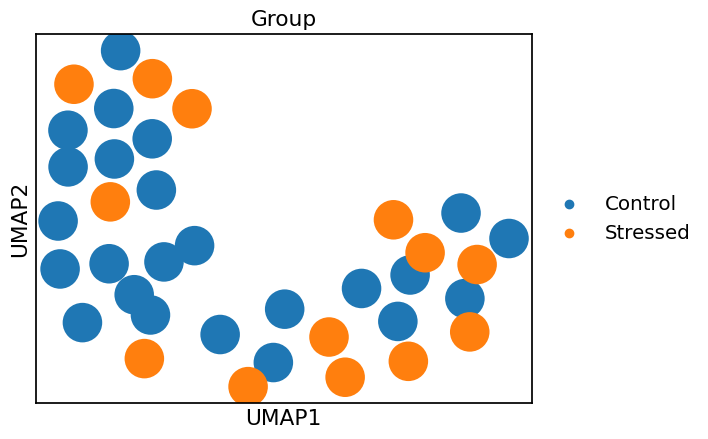

In [9]:
adatac0 = adata[adata.obs['L1'] == 'c0']

sc.tl.umap(adatac0)
sc.pl.umap(adatac0, color='Group')

In [10]:
adatac0

AnnData object with n_obs × n_vars = 37 × 25000
    obs: 'cell', 'leiden', 'umap_0', 'umap_1', 'L1', 'L1_proba', 'Group', 'AnimalID', 'Type', 'TotalRead', 'mCGFrac'
    var: 'chrom', 'end', 'start', 'CHN_mean', 'CHN_dispersion', 'CHN_cov', 'CHN_score', 'CHN_feature_select', 'CGN_mean', 'CGN_dispersion', 'CGN_cov', 'CGN_score', 'CGN_feature_select', 'leiden_enriched_features'
    uns: 'leiden', 'leiden_colors', 'leiden_feature_enrichment', 'log', 'neighbors', 'pca', 'umap', 'Group_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [42]:
#save plot
plt.savefig(f"mch_precluster_{var_dim}_adatac0_byGroup.png")


<Figure size 640x480 with 0 Axes>

Found 2 clusters to compute feature enrichment score
Computing enrichment score


/share/lasallelab/Ensi/anaconda3/lib/python3.11/site-packages/ALLCools/clustering/feature_selection/feature_enrichment.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for label, sub_df in raw_adata.obs.groupby(labels):
/share/lasallelab/Ensi/anaconda3/lib/python3.11/site-packages/ALLCools/clustering/feature_selection/feature_enrichment.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for label, sub_df in raw_adata.obs.groupby(labels):


Computing enrichment score FDR-corrected P values
Selected 11 unique features


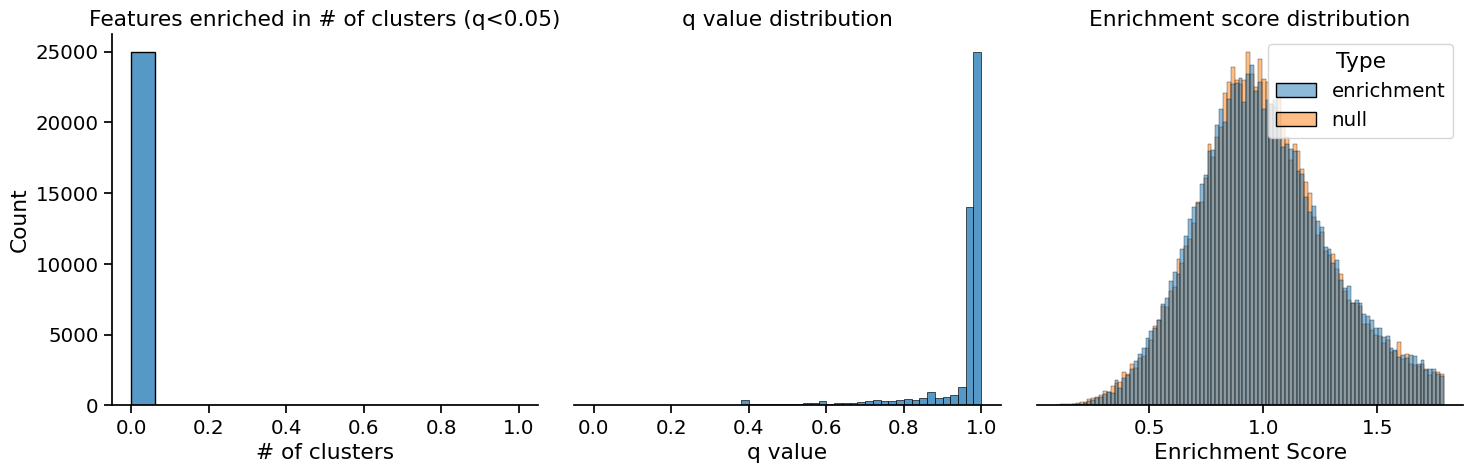

In [11]:
# cluster enriched features
cluster_enriched_features(adatac0,
                          cluster_col=cluster_col,
                          top_n=top_n,
                          alpha=alpha,
                          stat_plot=True)

In [44]:
# save 
plt.savefig(f"mch_CEF_alpha0.05topn500_{var_dim}_c0byGroup.png")


<Figure size 640x480 with 0 Axes>

In [12]:
# save adata
adatac0.write_h5ad(adata_path2)
adatac0

AnnData object with n_obs × n_vars = 37 × 25000
    obs: 'cell', 'leiden', 'umap_0', 'umap_1', 'L1', 'L1_proba', 'Group', 'AnimalID', 'Type', 'TotalRead', 'mCGFrac'
    var: 'chrom', 'end', 'start', 'CHN_mean', 'CHN_dispersion', 'CHN_cov', 'CHN_score', 'CHN_feature_select', 'CGN_mean', 'CGN_dispersion', 'CGN_cov', 'CGN_score', 'CGN_feature_select', 'leiden_enriched_features', 'Group_enriched_features'
    uns: 'leiden', 'leiden_colors', 'leiden_feature_enrichment', 'log', 'neighbors', 'pca', 'umap', 'Group_colors', 'Group_feature_enrichment'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'